In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_path = "/Users/oliverpaul/Data_Science/idiap/lucideles/lucideles_repo/project_2/room_1/inputs"

In [4]:
df = pd.read_csv(data_path + "/data.csv")

In [5]:
for i in df.columns:
    print(df[i].dtypes)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


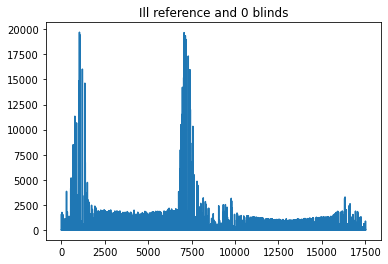

In [6]:
plt.plot(df[df['blind_angle_s']==0].ill)
plt.title("Ill reference and 0 blinds")
plt.show()

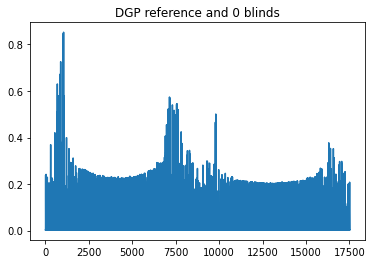

In [7]:
plt.plot(df[df['blind_angle_n']==0].dgp)
plt.title("DGP reference and 0 blinds")
plt.show()

In [8]:
blind_positions = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]

def plot_cols(fixed_column, target):
    if fixed_column == 'blind_angle_s':
        window = 'south window'
        other_window = 'north window'
    else:
        window = 'north window'
        other_window = 'south window'
    fig, axes = plt.subplots(len(blind_positions), figsize = (16, 6 *len(blind_positions)))
    for i, ax in zip(blind_positions, axes):
        ax.plot(df[df[fixed_column]==i].reset_index()[target])
        ax.title.set_text(f'Blind angle {i} for {window}, across all blind positions for {other_window}\n{target}')
        for j, k in zip(range(0, df[df[fixed_column]==i].shape[0], 8760), blind_positions):
            ax.axvline(j, ls='--', c='red', alpha=0.7)
            ax.annotate(str(k), (j,df[df[fixed_column]==i].reset_index()[target].max()*0.95))
            

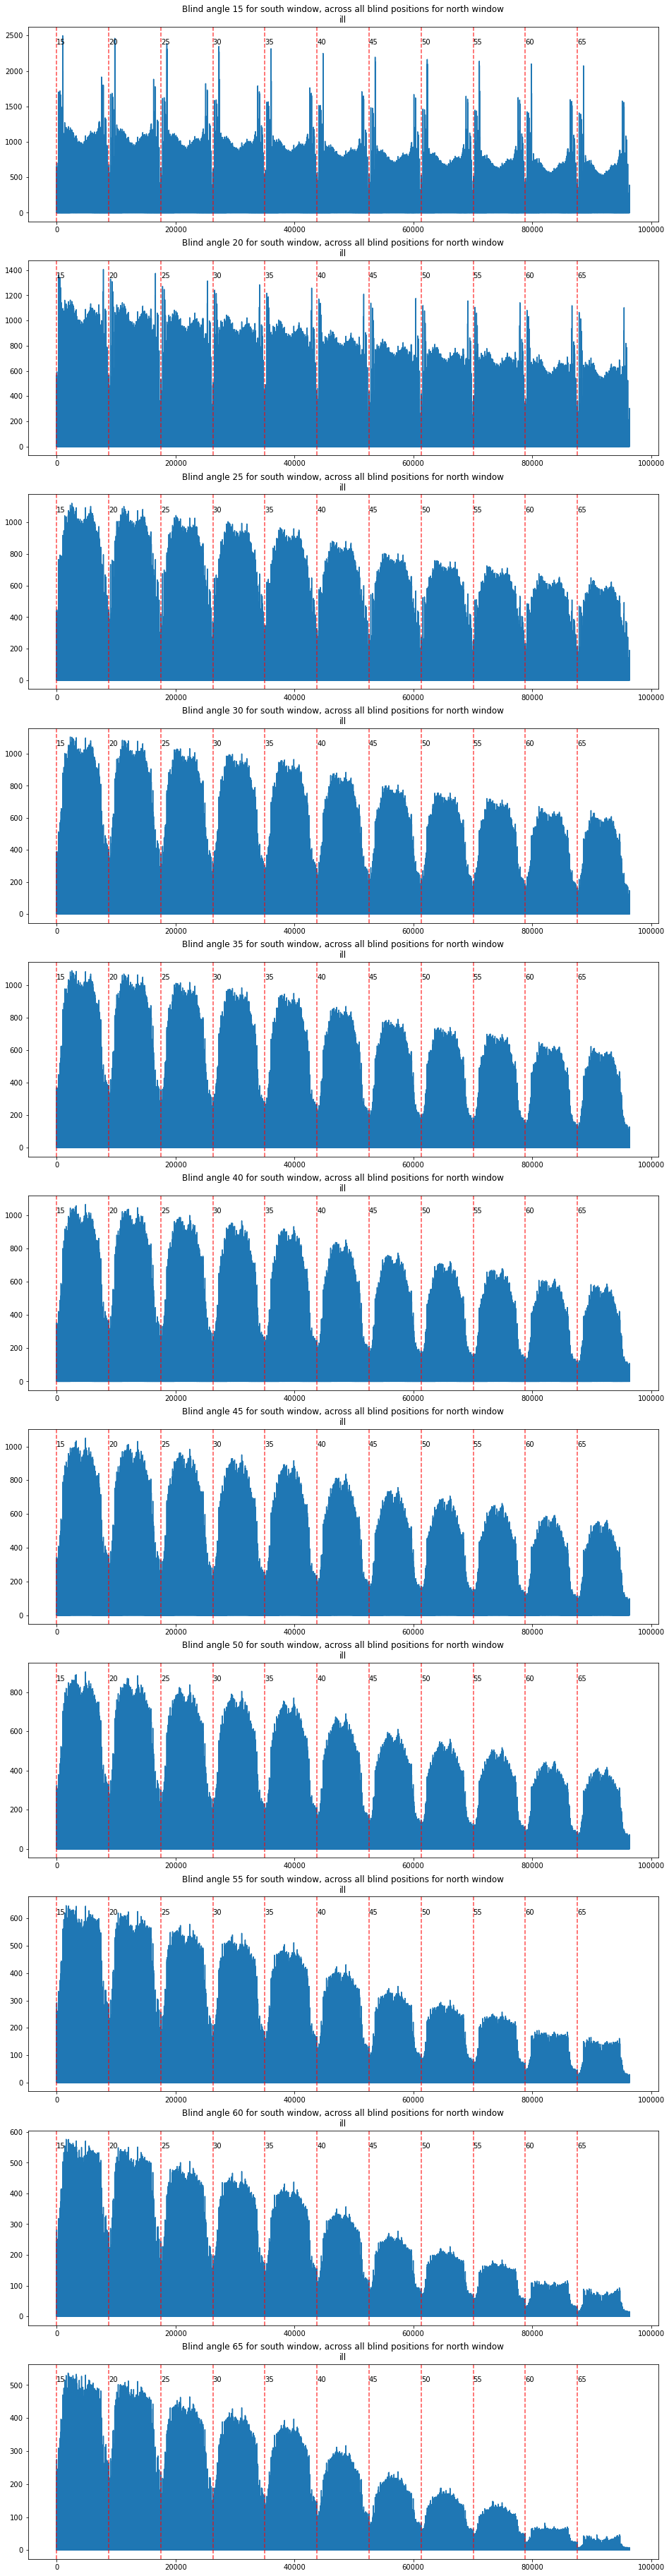

In [9]:
plot_cols('blind_angle_s', 'ill')

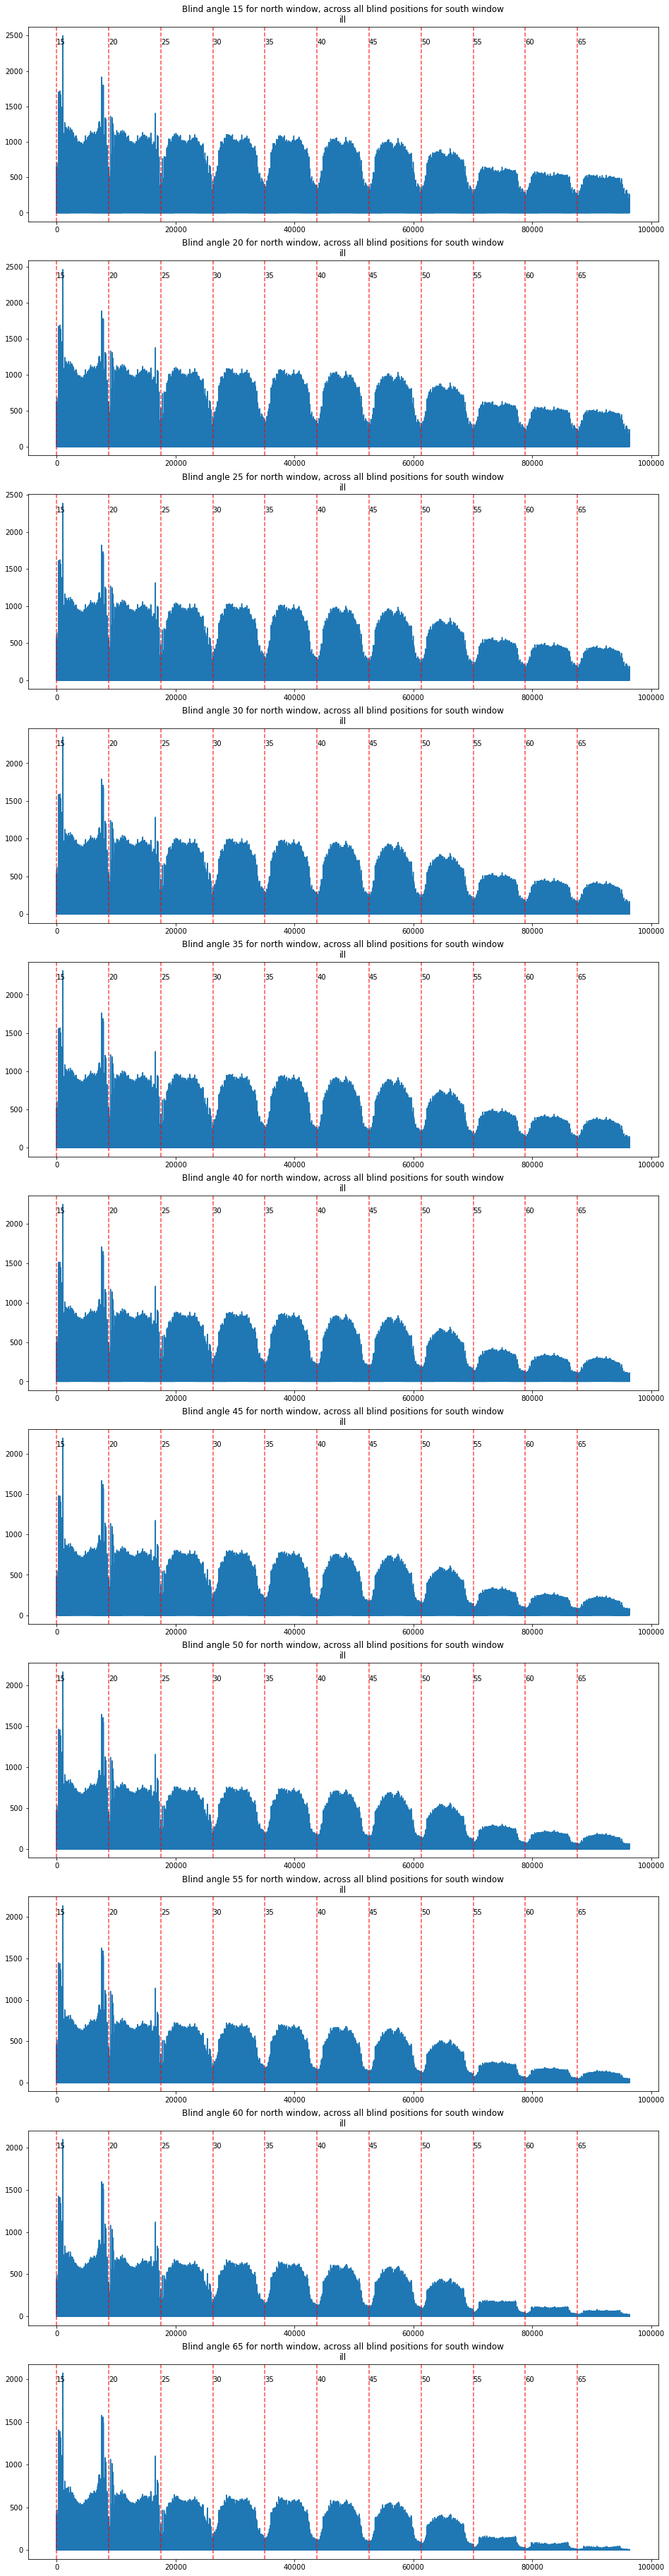

In [10]:
plot_cols('blind_angle_n', 'ill')

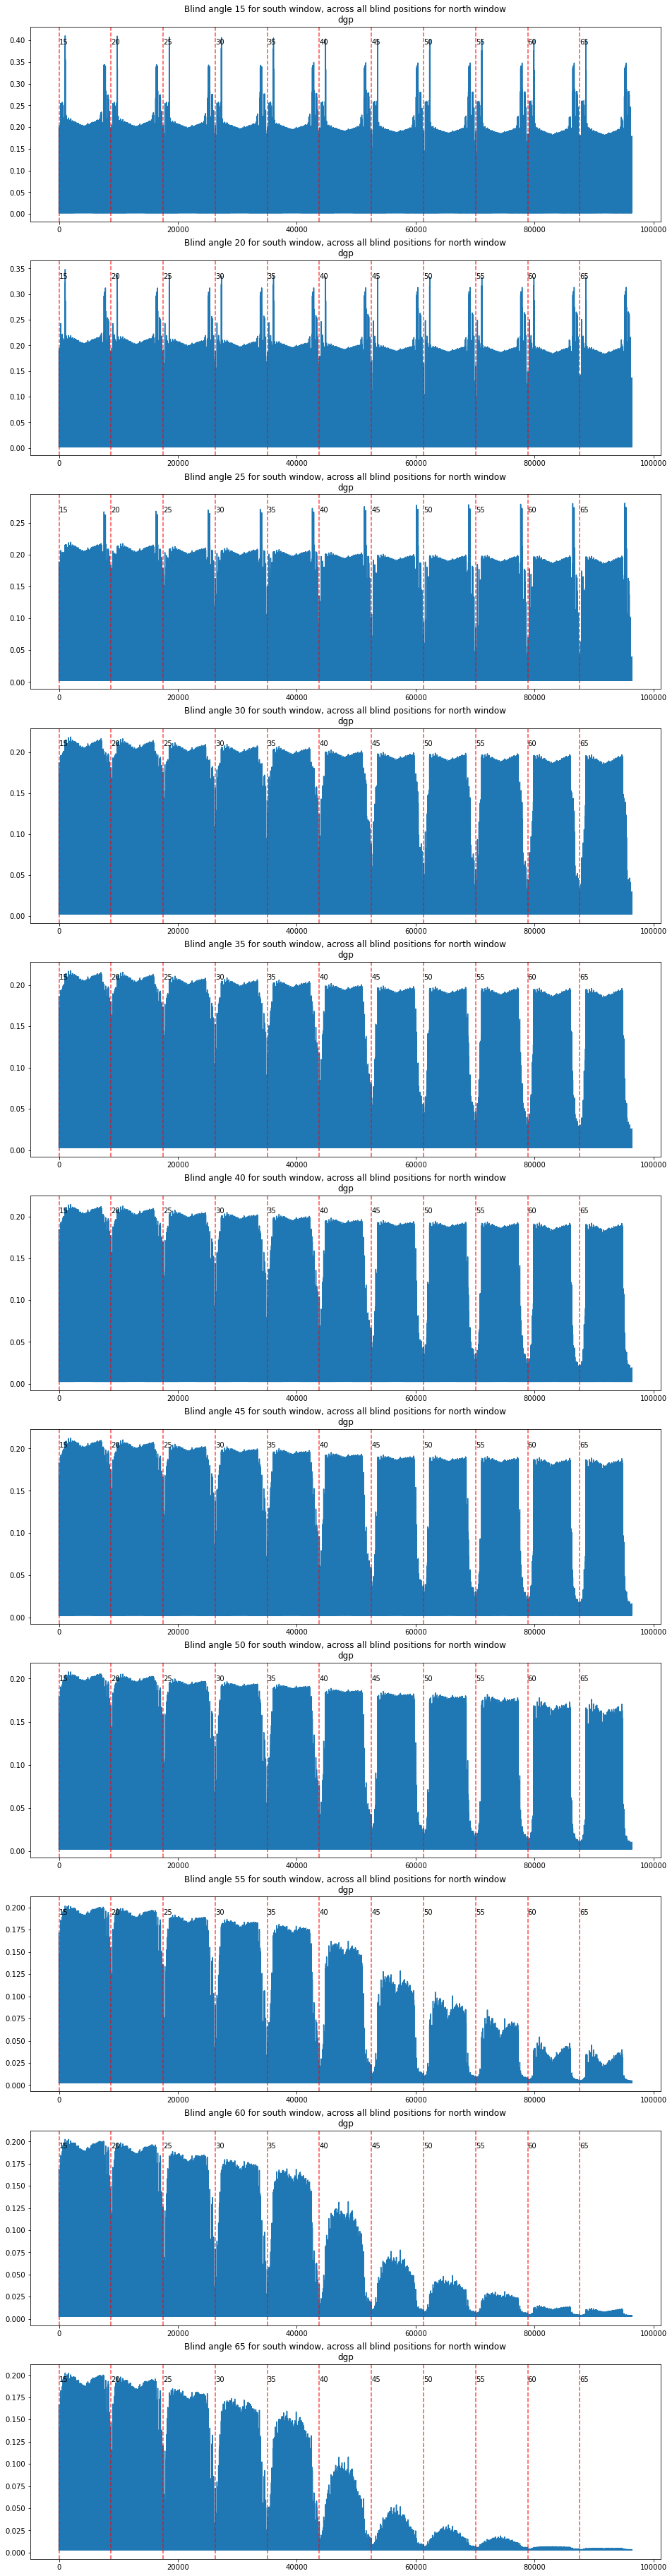

In [11]:
plot_cols('blind_angle_s', 'dgp')

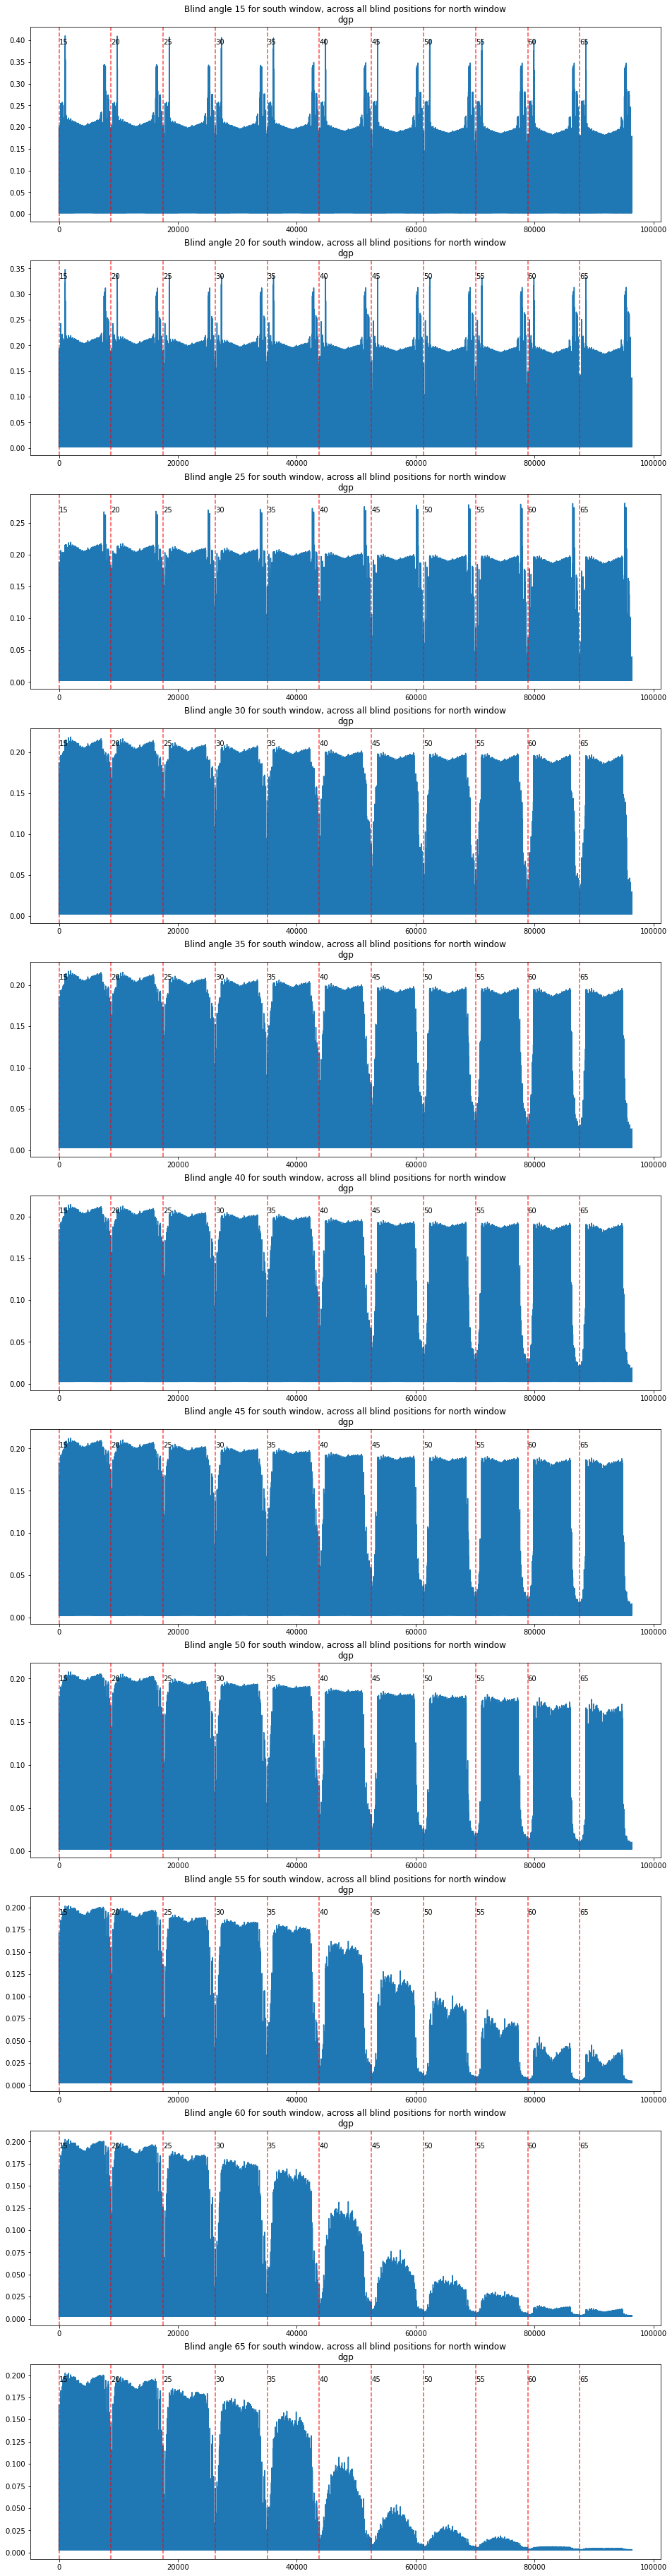

In [12]:
plot_cols('blind_angle_s', 'dgp')

### Inspecting transformed azimuth features

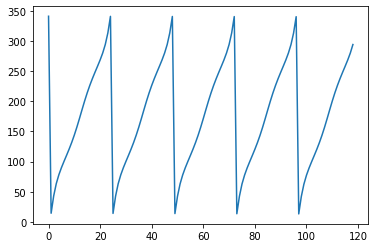

In [13]:
# original dataframe
# for 5 days
plt.plot(df['azimuth'][:119])
plt.show()

In [14]:
# transformed dataframe 

df_2 = pd.read_csv(data_path + "/data_transform.csv")

In [15]:
df_2

,month,day,hour,altitude,ibn,idh,reference,blind_angle_n,blind_angle_s,ill,dgp,azimuth_sin,azimuth_cos
0,1.0,1.0,0.0,-65.2778,0.0,0.0,1.0,0.0,0.0,0.0,0.00286,-0.222039,0.975038
1,1.0,1.0,1.0,-65.7003,0.0,0.0,1.0,0.0,0.0,0.0,0.00286,0.255079,0.966920
2,1.0,1.0,2.0,-60.6698,0.0,0.0,1.0,0.0,0.0,0.0,0.00286,0.696509,0.717548
3,1.0,1.0,3.0,-52.3974,0.0,0.0,1.0,0.0,0.0,0.0,0.00286,0.904484,0.426507
4,1.0,1.0,4.0,-42.7015,0.0,0.0,1.0,0.0,0.0,0.0,0.00286,0.983780,0.179380
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077475,12.0,31.0,19.0,-20.9853,0.0,0.0,0.0,65.0,65.0,0.0,0.00286,-0.992274,-0.124062
1077476,12.0,31.0,20.0,-31.1682,0.0,0.0,0.0,65.0,65.0,0.0,0.00286,-0.998197,0.060024
1077477,12.0,31.0,21.0,-41.3930,0.0,0.0,0.0,65.0,65.0,0.0,0.00286,-0.965126,0.261788
1077478,12.0,31.0,22.0,-51.2003,0.0,0.0,0.0,65.0,65.0,0.0,0.00286,-0.869864,0.493291


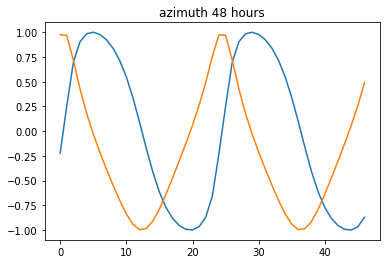

In [16]:
# for 2 days
plt.plot(df_2['azimuth_sin'][:47])
plt.plot(df_2['azimuth_cos'][:47])
plt.title("azimuth 48 hours")
plt.show()

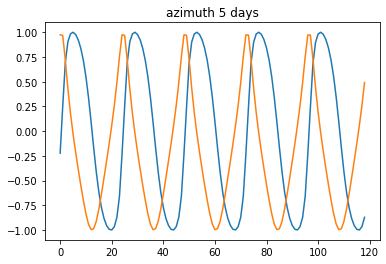

In [17]:
# for 5 days
plt.plot(df_2['azimuth_sin'][:119])
plt.plot(df_2['azimuth_cos'][:119])
plt.title("azimuth 5 days")
plt.show()

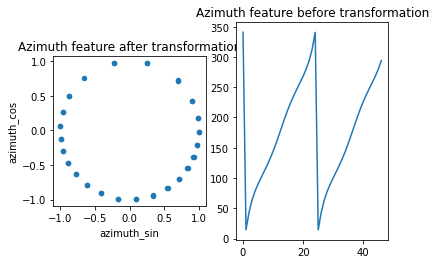

In [18]:
# for 48 hours
fig, ax = plt.subplots(1, 2)
df_2[:47].plot.scatter('azimuth_sin','azimuth_cos', ax=ax[0]).set_aspect('equal')
ax[1].plot(df['azimuth'][:47])
ax[0].set_title("Azimuth feature after transformation")
ax[1].set_title("Azimuth feature before transformation")
plt.show()

### Plotting all features against target

In [19]:
def plot_cols(column_list, target_col, df):
    len_col = len(column_list)
    color = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    fig, axes = plt.subplots(len_col, figsize = (6, 6 *len_col))
    for col, ax in zip(column_list, axes): 
        ax.scatter(df[col], df[target_col], alpha = 0.3, c = np.random.choice(color))
        ax.set_xlabel(col)
        ax.set_ylabel(target_col)
        
cols_list = list(df.columns)
cols_list.remove('dgp')
cols_list.remove('ill')
cols_list.remove('day')

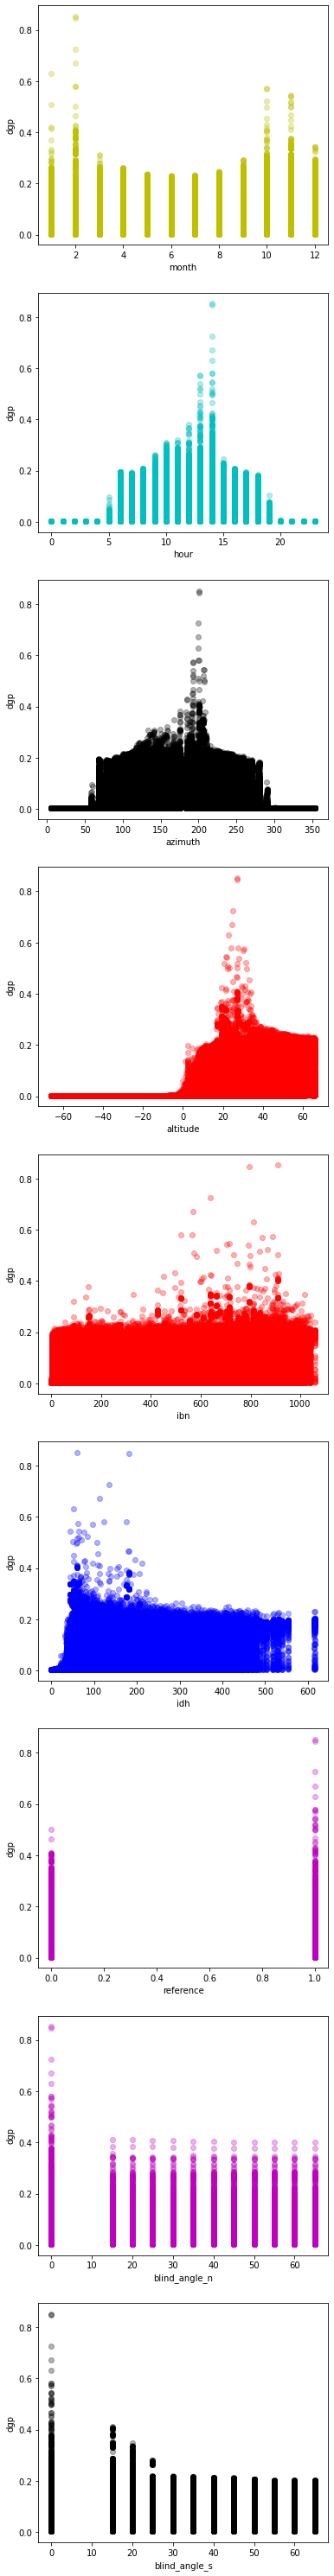

In [20]:
target_col = 'dgp'
plot_cols(cols_list, target_col, df)

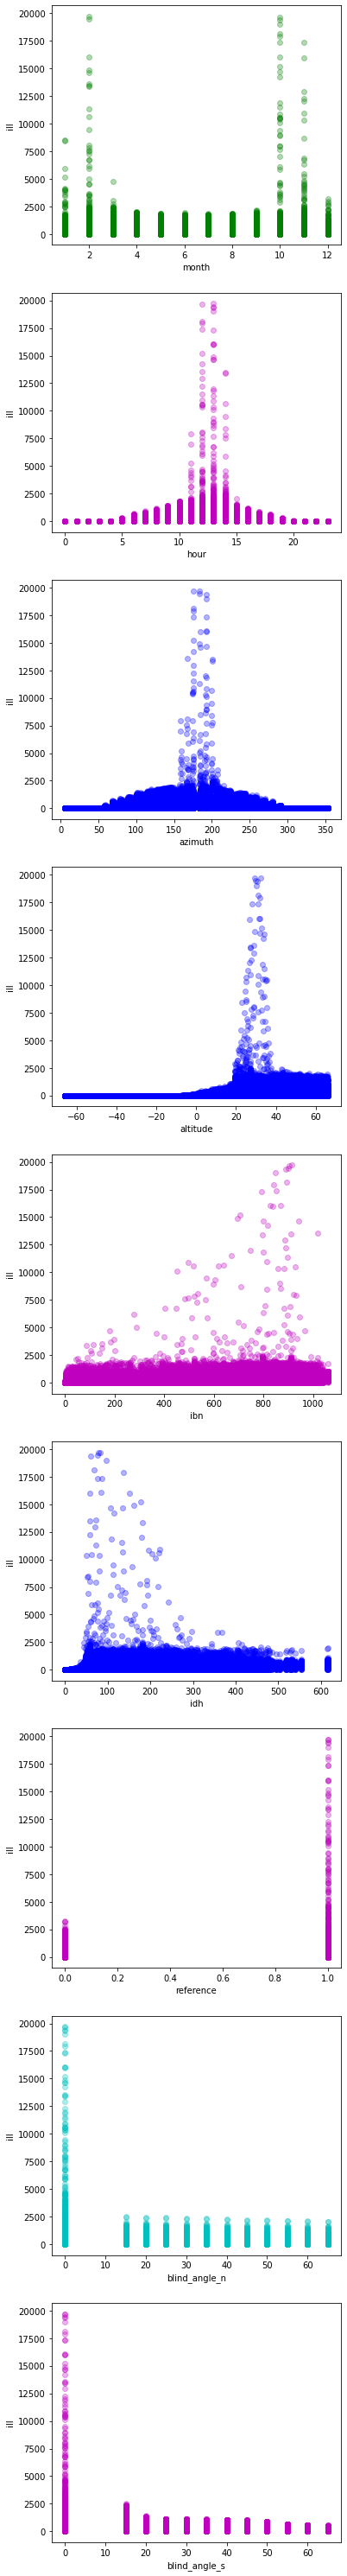

In [21]:
target_col = 'ill'
plot_cols(cols_list, target_col, df)

### Plotting all features

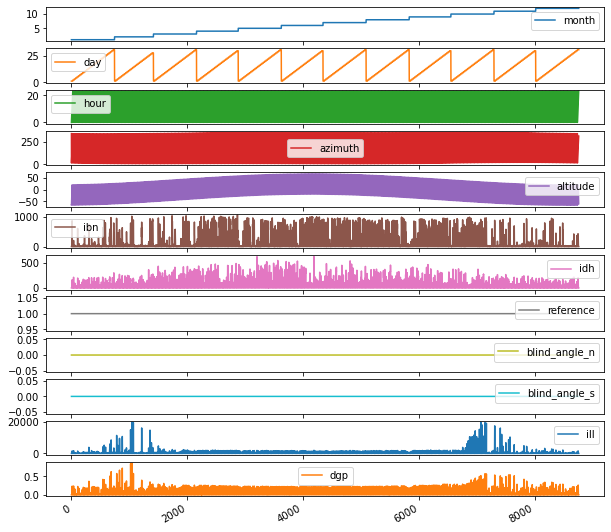

In [22]:
_=df[0:8760].plot(subplots=True, figsize=(10,10))